# Wizualizacje
## Matplotlib
Matplotlib to podstawowa biblioteka Pythona do tworzenia wykresów. Liczba opcji i ustawień jest ogromna. Poniżej przedstawione zostały podstawy i dobre praktyki tworzenia wykresów, które pozwolą na swobodne poruszanie się po świecie wizualizacji w Pythonie.

Najlepszym wprowadzeniem jest chyba ten artykuł (kilka poniższych przykładów pochodzi z tej oficjalnej dokumentacji):
* http://matplotlib.org/faq/usage_faq.html#matplotlib-pyplot-and-pylab-how-are-they-related

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML

Zacznijmy od prostego przykładu. Zauważmy, że plt, to po prostu matplotlib.pyplot czyli obiekt matplotliba do rysowania.

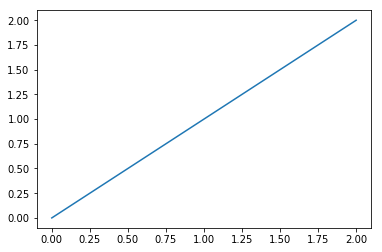

In [2]:
# Utwórzmy serię danych
x = np.linspace(0, 2, 100)
# Narysujmy
plt.plot(x, x, label='Wykres liniowy')


Zobaczmy teraz co się stanie jak spróbujemy narysować dwa wykresy, jeden pod drugim.

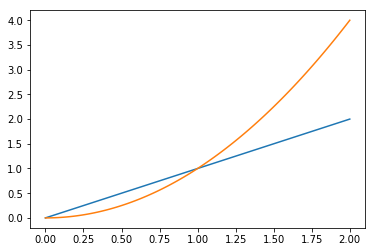

In [3]:
plt.plot(x, x, label='Wykres liniowy')
plt.plot(x, x**2, label='Wykres kwadratowy')

Z jakiegoś powodu obydwa wykresy narysowały sie jeden nad drugim. Zobaczmy jak to zrobić, aby narysować dwa wykresy osobno.

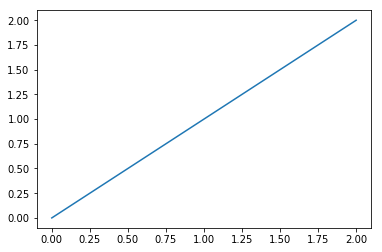

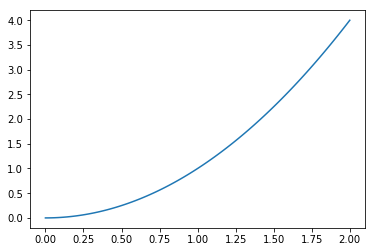

In [4]:
plt.plot(x, x, label='Wykres liniowy')
plt.show()
plt.plot(x, x**2, label='Wykres kwadratowy')
plt.show()

Pierwsze polecenie .plot() tworzy nowy wykres (płótno do rysowania). Całość nie jest wyrzucana na ekran dopóki komórka w całości nie zostanie wykonana lub do momentu w którym nie nakażemy pokazania wykresu (plt.show()). Po pokazaniu wykresu jest on kasowany. Możemy zobaczyć to na poniższym przykazie.

Plik foo.png jest pusty, ponieważ poprosiliśmy o zapisanie obrazu już po jego wyświetleniu (bufor został wyczyszczony).

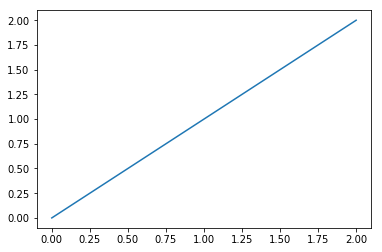

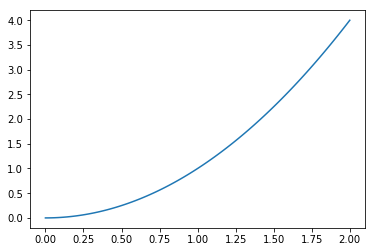

In [5]:
plt.plot(x, x, label='Wykres liniowy')
plt.show()
plt.savefig('img/foo.png')
plt.plot(x, x**2, label='Wykres kwadratowy')
plt.savefig('img/foo1.png')
plt.show()


Zobaczmy teraz co się stanie, jeżeli zapiszemy obrazy pomiędzy dodawanymi seriami.

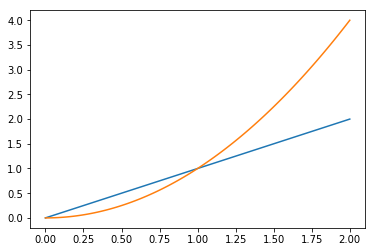

In [6]:
plt.plot(x, x, label='Wykres liniowy')
plt.savefig('img/boo.png')
plt.plot(x, x**2, label='Wykres kwadratowy')
plt.savefig('img/boo1.png')
plt.show()

Zgodnie z oczekiwaniem boo.png zawiera obraz z tylko jedną serią, a boo1.png z dwom. Zapisywanie do pliku nie czyści nam więc bufora.

Zobaczmy teraz jak do wykresu dodać kilka przydatnych informacji.

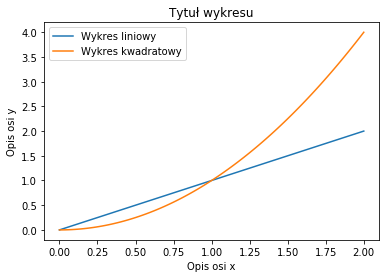

In [7]:
plt.plot(x, x, label='Wykres liniowy')
plt.plot(x, x**2, label='Wykres kwadratowy')
plt.xlabel('Opis osi x')
plt.ylabel('Opis osi y')
plt.title("Tytuł wykresu")
plt.legend()

Widzimy już, że zaczyna to przypominać sensowny wykres, nad którego elementami możemy panować.

W praktyce zwracanie się do elementów wykresu bezpośrednio poprzez cały obiekt matplotlib nie jest najlepszą praktyką. O ile w przypadku prostych pojedynczych wykresów nie ma z tym najmniejszego problemu. Jednak kiedy chcemy mieć większą kontrolę nad wykresem i dogadywać się z nim z wykorzystaniem innych pakietów, np. pandas, warto przyjrzeć się kontroli nad wykresami dokładniej.

Matplotlib rozdziela wykrs na dwa obiekty. Figure i Axes. Pierwszy z nich kontroluje "opakowanie" wykresu, całość płótna, a Axes to już obszar pojedynczych wykresów, które niekoniecznie muszą zajmować całe płótno.

Poniżej zaczniemy od stworzenia obrazu/płótna w rozmiarze 6,6.
* https://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure

In [8]:
fig = plt.figure(figsize=(6,6))

Następnie poprosimy aby zagospodarować płótno. fig.add_subplot(1, 1, 1) - cyfry oznaczają kolejno na ile rzędów i kolumn mamy podzielić płótno, a nastepnie do którego kawałka płótna chcemy się odwołać. Funkcja add_subplot zwraca włąśnie Ax, czyli już fragemnt całego płótna do rysowania.
* https://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure.add_subplot
* https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot
Zwróćmy uwagę na to, że komendy do oznaczenia osi oraz tytułu wykresu uległy drobnej zmianie. Nazwy metod są trochę inne dla obiektu Ax niż gdy zwracamy się przez cały moduł plt.

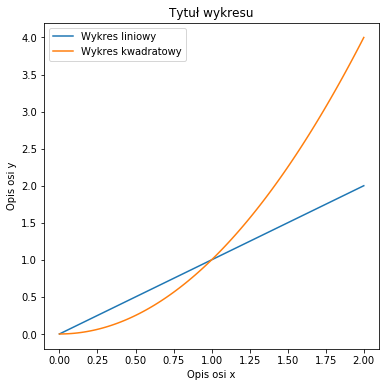

In [9]:
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, x, label='Wykres liniowy')
ax.plot(x, x**2, label='Wykres kwadratowy')
ax.set_xlabel('Opis osi x')
ax.set_ylabel('Opis osi y')
ax.set_title("Tytuł wykresu")
ax.legend()
fig.savefig("img/fig.png")
# ponieważ utworzyliśmy fig w innej komórce musimy wywolać rysowanie.
fig

Żeby lepiej zroumieć po co nam ax przyjrzyjmy się temu przykładowi.

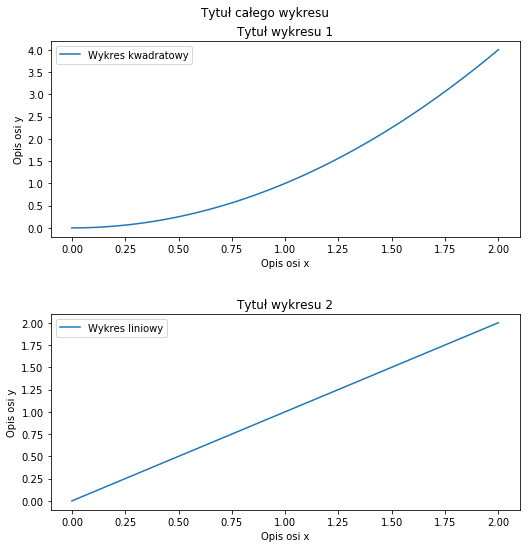

In [10]:

fig = plt.figure(figsize=(8,8))
fig.suptitle('Tytuł całego wykresu', fontsize=12)

ax = fig.add_subplot(2, 1, 1)

ax.plot(x, x**2, label='Wykres kwadratowy')
ax.set_xlabel('Opis osi x')
ax.set_ylabel('Opis osi y')
ax.set_title("Tytuł wykresu 1")
ax.legend()

ax = fig.add_subplot(2, 1, 2)
ax.plot(x, x, label='Wykres liniowy')
ax.set_xlabel('Opis osi x')
ax.set_ylabel('Opis osi y')
ax.set_title("Tytuł wykresu 2")
ax.legend()
# Polecenie tight layout stara się ułożyć wszystkie elementy tak, żeby na siebie nie nachodziły.
fig.tight_layout(pad=3)

Subploty i osie możemy tworzyć w jeszcze inny, możliwe, że wygodniejszy sposób. Przykład niemalże identyczny do powyższego.

Dla "czytelności" połączę jednak osie x ze sobą (w pierwszym wierszu sharex) i pozbędę się jednej etykiety i tytułu.

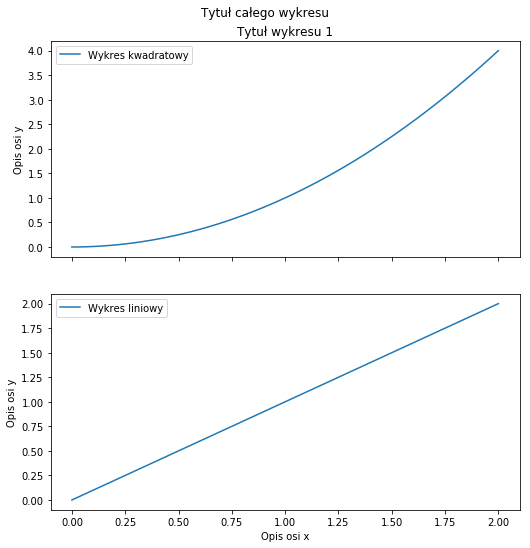

In [11]:
fig, ax = plt.subplots(2, 1,figsize=(8,8), sharex=True)

fig.suptitle('Tytuł całego wykresu', fontsize=12)

ax[0].plot(x, x**2, label='Wykres kwadratowy')
# ax[0].set_xlabel('Opis osi x')
ax[0].set_ylabel('Opis osi y')
ax[0].set_title("Tytuł wykresu 1")
ax[0].legend()


ax[1].plot(x, x, label='Wykres liniowy')
ax[1].set_xlabel('Opis osi x')
ax[1].set_ylabel('Opis osi y')
# ax[1].set_title("Tytuł wykresu 2")
ax[1].legend()
fig.tight_layout(pad=3)

Wykresy możemy tworzyć w dowolnych układach gridowych. Przy okazji zobaczmy, że ax przyjmuje też opcję set ze słownikiem.

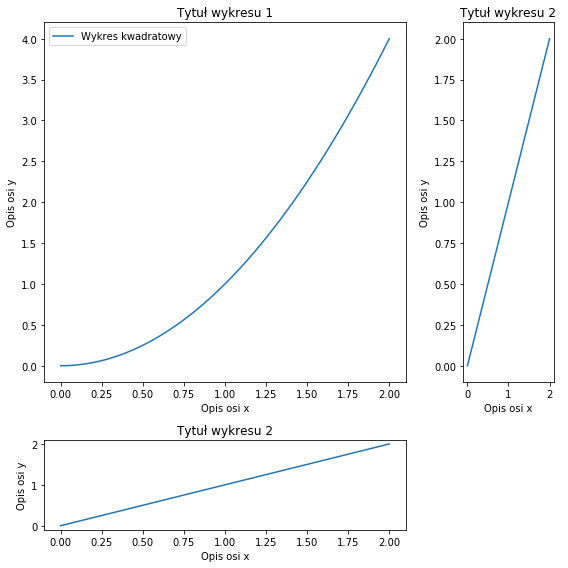

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(8,8), gridspec_kw={'width_ratios':[4, 1], 'height_ratios':[4, 1]})

ax[0,0].plot(x, x**2, label='Wykres kwadratowy')
ax[0,0].set(**{"xlabel":'Opis osi x', "ylabel":'Opis osi y', "title":'Tytuł wykresu 1'})
# ax[0,0].set_xlabel('Opis osi x')
# ax[0,0].set_ylabel('Opis osi y')
# ax[0,0].set_title("Tytuł wykresu 1")
ax[0,0].legend()


ax[1,0].plot(x, x, label='Wykres liniowy')
ax[1,0].set_xlabel('Opis osi x')
ax[1,0].set_ylabel('Opis osi y')
ax[1,0].set_title("Tytuł wykresu 2")



ax[0,1].plot(x, x, label='Wykres liniowy')
ax[0,1].set_xlabel('Opis osi x')
ax[0,1].set_ylabel('Opis osi y')
ax[0,1].set_title("Tytuł wykresu 2")

# W prawym dolnym rogu już nic nie chcę mieć, więc wyłączę rysowanie osi i nic więcej nie dodam.
ax[1,1].axis("off")
fig.tight_layout()

W praktyce możemy rysować dowolne kształty naszego płótna i nawet je na siebie nakąldać jeżeli tylko chcemy korzystając z polecenia add_axes.
* https://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure.add_axes

In [13]:
fig = plt.figure(figsize=(8,5))
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax2 = fig.add_axes([0.72, 0.72, 0.16, 0.16])
ax1.plot(x, np.sin(8*x), label='Wykres liniowy')
ax2.plot(x, x, label='Wykres liniowy')


Annotacje

In [23]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(6,4))    
x = ["2013", "2014", "2015", "2015"]
y = [350, 400, 430, 470]
index = list(range(4))
# width = 0.85

ax.set_xticks(index)
ax.set_xticklabels(x)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
yd = []
for i, x in enumerate(y):
    if i<len(y)-1:
        yd.append("+"+str(int(round((y[i+1]/y[i])*100, 0)))+"%")
        
for i, p in enumerate(ax.patches):
    ax.annotate(y[i], (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', rotation=0, xytext=(0, 20), textcoords='offset points')
        
for i, p in enumerate(ax.patches):
    if i==0:
        continue
    ax.annotate(yd[i-1], (p.get_x() + p.get_width() / 2.,p.get_height()/2), ha='center', va='center', rotation=0, xytext=(0, 0),  color="white", textcoords='offset points')
    
plt.show()